In [264]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from scipy import stats

In [265]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [266]:
data = pd.read_csv('heartattack.csv')

In [267]:
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [268]:
len(data.index)

1319

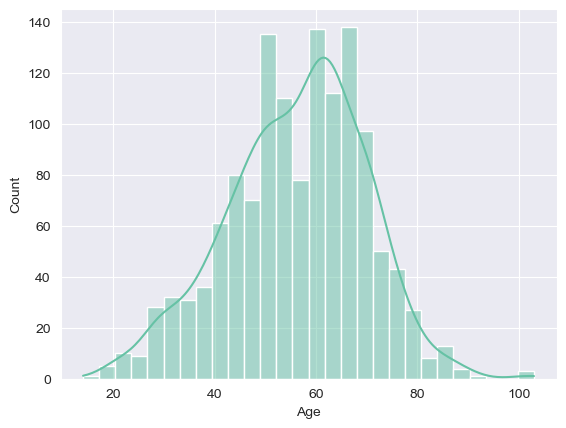

In [269]:
sns.histplot(x=data['Age'], kde=True)
plt.show()

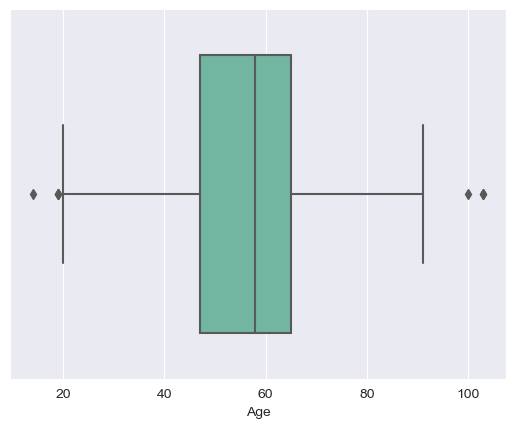

In [270]:
sns.boxplot(data=data, x='Age', width=0.75)
plt.show()

In [271]:
# check how many people are 100 and over
len(data[data['Age']>=100])

3

In [272]:
# check how many people are under 20
len(data[data['Age']<20])

4

### Explore how age is correlated to heart-attack

In [273]:
df = data.copy()

In [274]:
df['Result'] = LabelEncoder().fit_transform(df['Result'])

In [275]:
x_train, x_test, y_train, y_test = ttsplit(df['Age'], df['Result'], test_size=0.2, random_state=23)

In [276]:
regr = linear_model.LogisticRegression()

In [277]:
lm = regr.fit(x_train.values.reshape((-1,1)), y_train.values.reshape((-1)))

In [278]:
y_pred = lm.predict(x_test.values.reshape((-1,1)))

In [279]:
y_pred = y_pred.reshape(-1)

In [280]:
residuals = y_test.values-y_pred

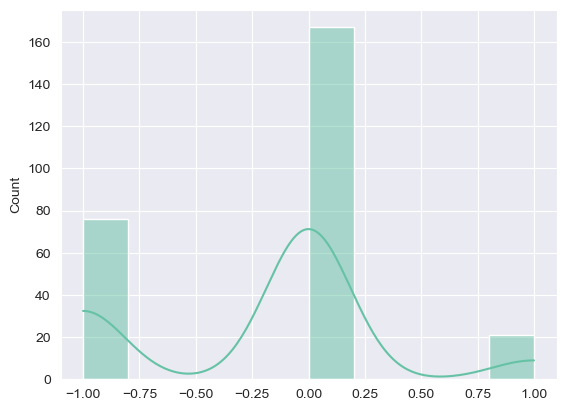

In [281]:
sns.histplot(kde=True, x=residuals)
plt.show()

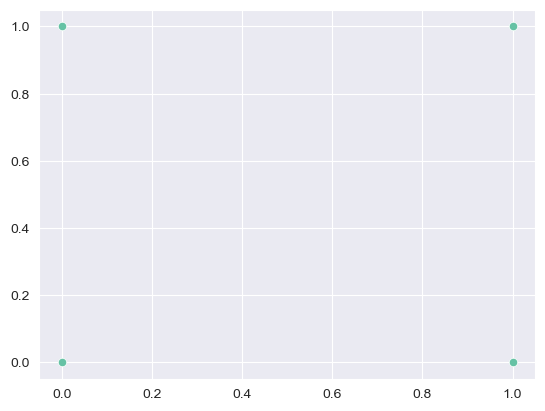

In [282]:
sns.scatterplot(x=y_test.values, y=y_pred)
plt.show()

In [283]:
df[['Age', 'Result']].corr()

,Age,Result
Age,1.000000,0.238097
Result,0.238097,1.000000


#### Age doesn't seem to be the major contributor for heart-attack.
Because for several cases where the result should have been `0`, based on `Age` the result came out to be `1`.

### Explore how gender is related to heart-attack

In [284]:
attack_summary_by_gender = df.groupby(by=['Gender'], as_index=False)['Result'].count()

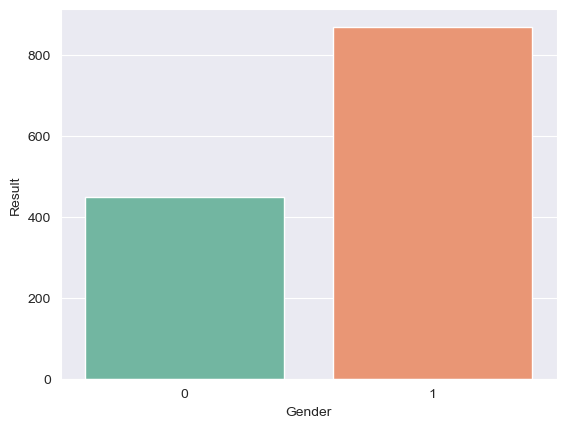

In [285]:
sns.barplot(data=attack_summary_by_gender, x='Gender', y='Result')
plt.show()

In [286]:
x_train, x_test, y_train, y_test = ttsplit(df['Gender'], df['Result'], test_size=0.2, random_state=13)

In [287]:
regr = linear_model.LogisticRegression()

In [288]:
lm = regr.fit(x_train.values.reshape((-1,1)), y_train.values.reshape((-1)))

In [289]:
y_pred = lm.predict(x_test.values.reshape((-1,1)))

In [290]:
residuals = y_test.values-y_pred

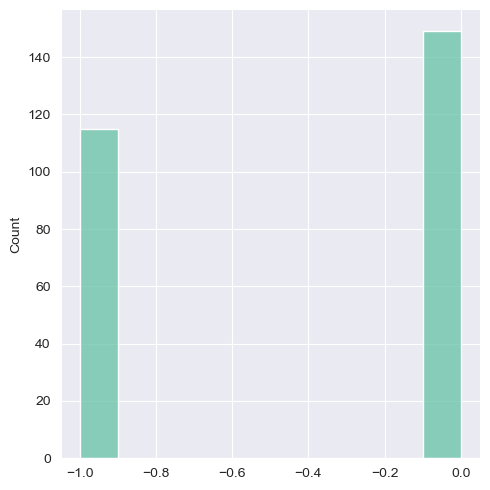

In [291]:
sns.displot(x=residuals)
plt.show()

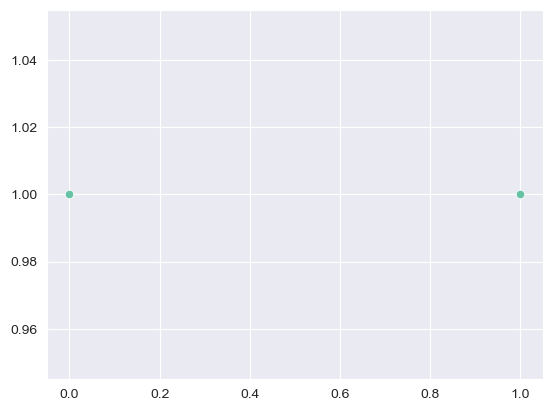

In [292]:
sns.scatterplot(x=y_test.values, y=y_pred)
plt.show()

In [293]:
len(y_pred[y_pred==0])

0

#### Gender alone is also not a significant indicator of heart-attack

In [294]:
_corr = df[['Gender', 'Result']].corr()['Result']['Gender']*100
print(f'Gender to Attack correlation ~= {round(_corr)}%')

Gender to Attack correlation ~= 9%


### Exploring heart-rate

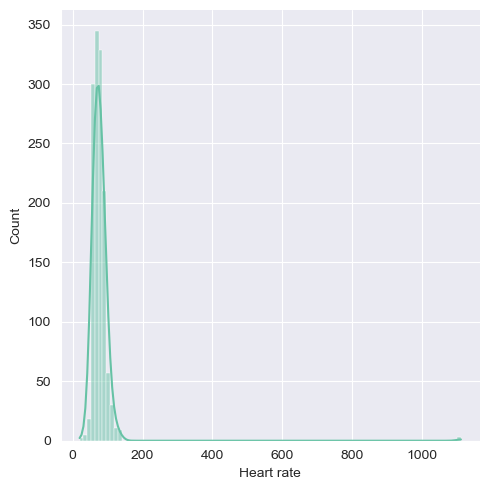

In [295]:
sns.displot(kde=True, x=df['Heart rate'], bins=100)
plt.show()

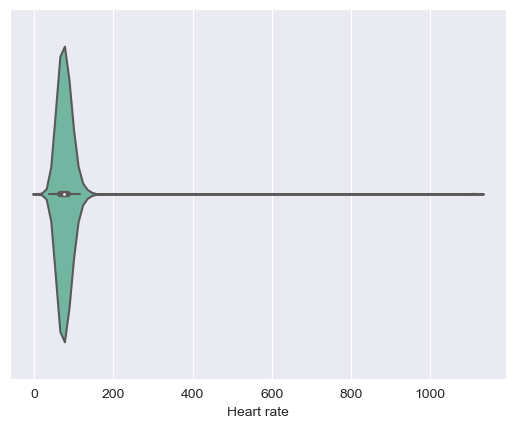

In [296]:
sns.violinplot(data=df, x='Heart rate')
plt.show()

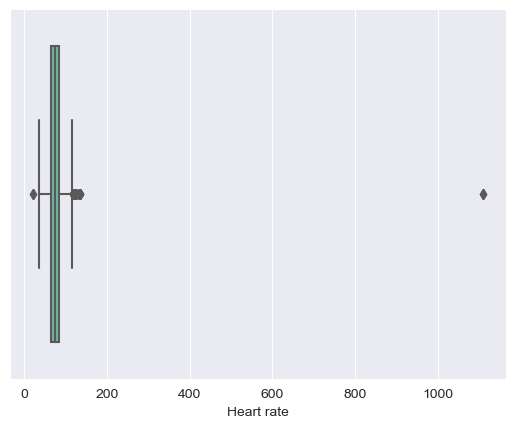

In [297]:
sns.boxplot(data=df, x='Heart rate')
plt.show()

#### There are a lot of outliers here

In [298]:
df['Heart rate'].describe()

count    1319.000000
mean       78.336619
std        51.630270
min        20.000000
25%        64.000000
50%        74.000000
75%        85.000000
max      1111.000000
Name: Heart rate, dtype: float64

In [299]:
stats.trim_mean(df['Heart rate'], 0.1)

74.77388836329234

In [300]:
len(df[df['Heart rate']>100])

82

In [301]:
len(df[df['Heart rate']<50])

10

In [302]:
# let's check the correlation between heart rate and Result
df[['Heart rate', 'Result']].corr()['Heart rate']['Result']

0.006920486214125786

In [303]:
_df = df.query('`Heart rate`>=50 & `Heart rate`<=100')

In [304]:
_df[['Heart rate', 'Result']].corr()['Heart rate']['Result']

-0.008452878539931197

#### Attack has higher correlation to heart rate when the outlier values of `Heart rate` is excluded

In [305]:
x_train, x_test, y_train, y_test = ttsplit(df['Heart rate'], df['Result'], test_size=0.2, random_state=13)

In [306]:
regr = linear_model.LogisticRegression()

In [307]:
lm = regr.fit(x_train.values.reshape((-1,1)), y_train.values.reshape((-1)))

In [308]:
y_pred = lm.predict(x_test.values.reshape((-1,1)))

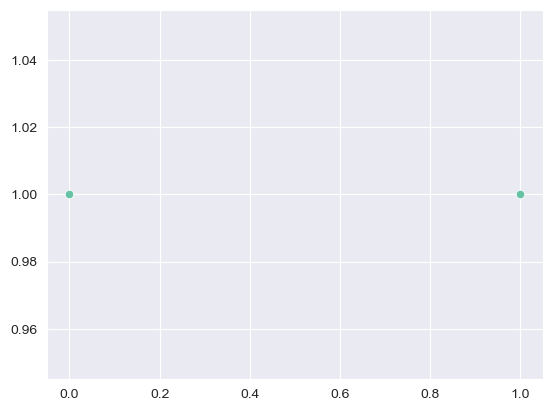

In [309]:
sns.scatterplot(x=y_test.values, y=y_pred)
plt.show()

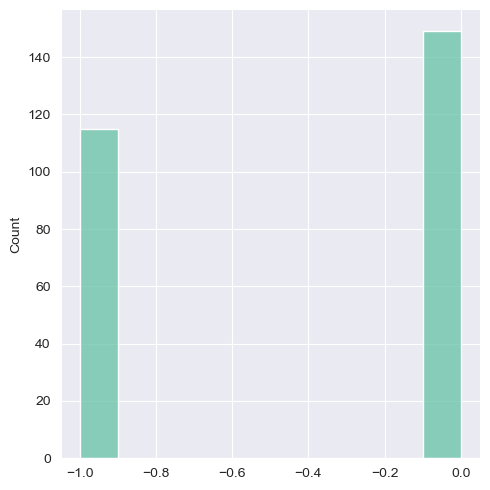

In [310]:
residuals = y_test.values - y_pred
sns.displot(x=residuals)
plt.show()

In [311]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

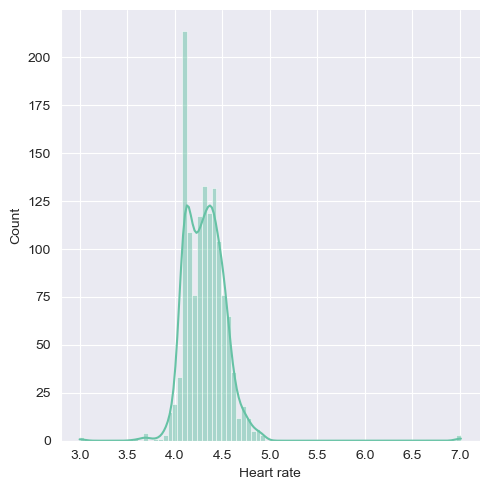

In [312]:
transformed_heart_rate = stats.boxcox(df['Heart rate'], lmbda=0)
sns.displot(x=transformed_heart_rate, kde=True)
plt.show()

In [313]:
df['Heart rate'] = transformed_heart_rate

In [314]:
df.rename(columns={'Systolic blood pressure':'s_bp', 'Diastolic blood pressure':'d_bp', 'Blood sugar':'sugar'},
          inplace=True)

### Exploring systolic B.P

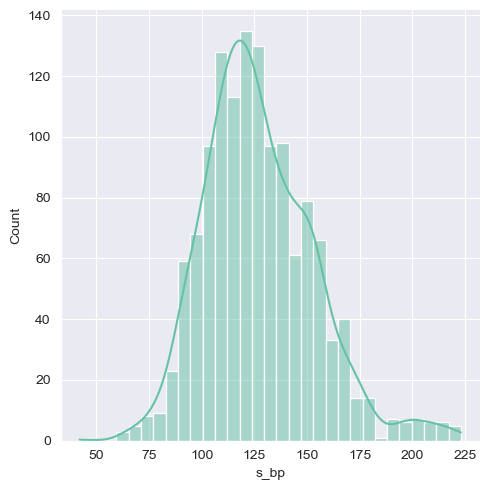

In [315]:
sns.displot(kde=True, x=df['s_bp'])
plt.show()

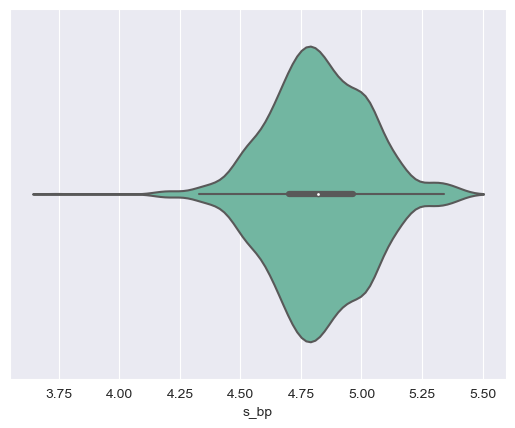

In [316]:
import math
sns.violinplot(x=df['s_bp'].map(math.log))
plt.show()

In [317]:
df[['s_bp', 'Result']].corr()

,s_bp,Result
s_bp,1.000000,-0.020825
Result,-0.020825,1.000000


In [318]:
x_train, x_test, y_train, y_test = ttsplit(df['s_bp'], df['Result'], test_size=0.2, random_state=13)

In [319]:
regr = linear_model.LogisticRegression()

In [320]:
lm = regr.fit(x_train.values.reshape((-1,1)), y_train.values.reshape((-1)))

In [321]:
y_pred = lm.predict(x_test.values.reshape((-1,1)))

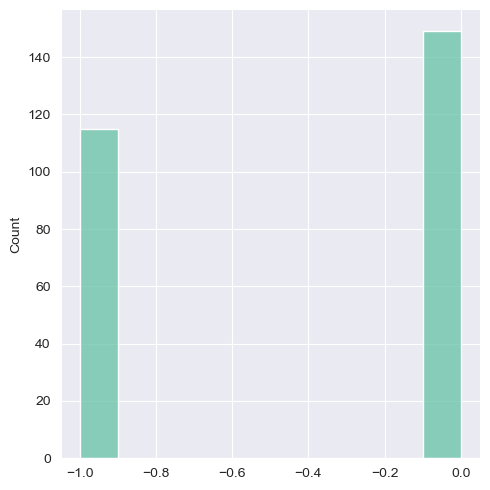

In [322]:
residuals = y_test.values - y_pred
sns.displot(x=residuals)
plt.show()

In [323]:
df.corr().sort_values(by='Result', ascending=False)

,Age,Gender,Heart rate,s_bp,d_bp,sugar,CK-MB,Troponin,Result
Result,0.238097,0.094432,0.006073,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000
Age,1.000000,-0.092874,-0.016029,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
Troponin,0.088800,0.065793,0.029701,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
CK-MB,0.018419,0.017527,-0.007955,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
Gender,-0.092874,1.000000,-0.008240,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
Heart rate,-0.016029,-0.008240,1.000000,-0.022702,0.136807,0.000235,-0.007955,0.029701,0.006073
d_bp,0.002614,-0.009370,0.136807,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
s_bp,0.017441,0.011065,-0.022702,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
sugar,-0.004193,0.006668,0.000235,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059


In [324]:
_df = df[['Age', 'Troponin', 'CK-MB','Gender', 'Result']].copy()

In [325]:
_df.rename(columns={'CK-MB':'ckmb'}, inplace=True)

In [326]:
_df['ckmb'].head()

0     1.80
1     6.75
2     1.99
3    13.87
4     1.08
Name: ckmb, dtype: float64

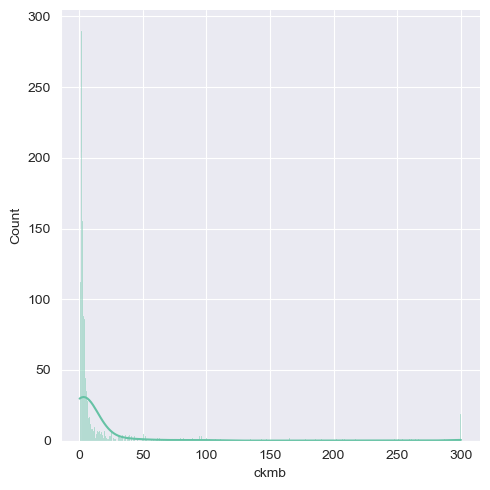

In [327]:
sns.displot(kde=True, x=_df['ckmb'])
plt.show()

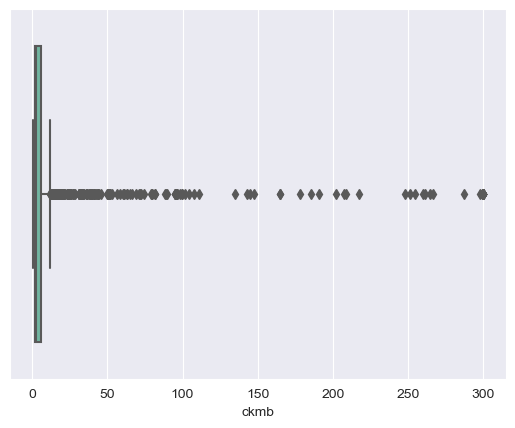

In [328]:
sns.boxplot(x=_df['ckmb'])
plt.show()

In [329]:
_df['ckmb'].describe()

count    1319.000000
mean       15.274306
std        46.327083
min         0.321000
25%         1.655000
50%         2.850000
75%         5.805000
max       300.000000
Name: ckmb, dtype: float64

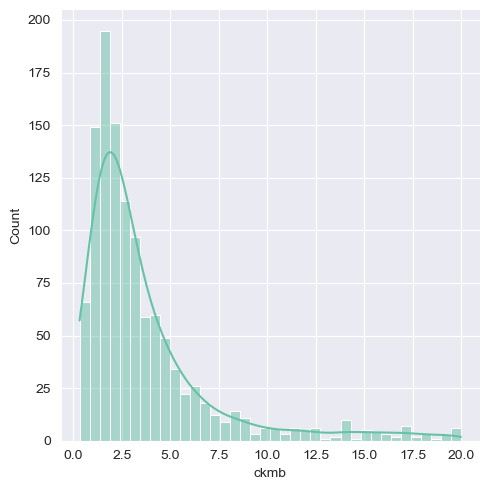

In [330]:
sns.displot(kde=True, x=_df[_df['ckmb']<20]['ckmb'])
plt.show()

In [331]:
_df[_df['ckmb']<20][['ckmb','Result']].corr()

,ckmb,Result
ckmb,1.000000,0.283027
Result,0.283027,1.000000


In [332]:
_filtered_ckmb = _df[_df['ckmb']<20]['ckmb']

In [333]:
_mean = _filtered_ckmb.mean()
_median = _filtered_ckmb.median()
_d = _filtered_ckmb.std()

skewness_coef = (_mean - _median)/_d
print(f'Skewness Coefficient: {skewness_coef}')

Skewness Coefficient: 0.3298172752763216


In [334]:
_filtered_ckmb_rep = _filtered_ckmb.copy()

#### transforming right skewed to as close as possible to normal distribution

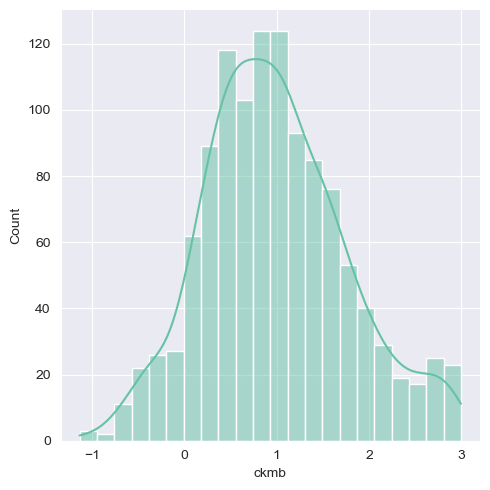

In [335]:
transformed_ckmb = stats.boxcox(_filtered_ckmb_rep, lmbda=0)
sns.displot(x=transformed_ckmb, kde=True)
plt.show()

In [336]:
normality_res = stats.normaltest(transformed_ckmb)

In [337]:
float(normality_res.pvalue)

3.309304308908486e-05

In [338]:
len(_df)

1319

In [339]:
X=_df.iloc[:,:-1]
Y=_df.iloc[:,-1]
x_train, x_test, y_train, y_test = ttsplit(X,Y, test_size=0.2, random_state=13)

In [340]:
_idx = x_train.query('Age<100 & Age>=20 & ckmb<20').index

In [341]:
x_train

,Age,Troponin,ckmb,Gender
886,35,0.003,2.160,1
1026,64,0.009,5.220,1
547,56,0.007,5.820,0
663,81,0.007,4.960,0
775,85,0.014,1.390,1
...,...,...,...,...
866,70,0.024,0.858,1
742,63,0.011,4.800,0
74,52,0.219,0.718,1
176,55,0.014,2.000,1


In [342]:
x_train = x_train[x_train.index.isin(_idx.values)]
y_train = y_train[y_train.index.isin(_idx.values)]

In [343]:
x_train['ckmb']=transformed_ckmb

/var/folders/gw/lpzg_5qx4xs1zxy36cq8fs0r0000gn/T/ipykernel_84584/2474206359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['ckmb']=transformed_ckmb


### Scale the features

In [344]:
from sklearn.preprocessing import StandardScaler

In [345]:
scaler = StandardScaler()  

In [346]:
scaled_x_train = scaler.fit_transform(x_train)

In [347]:
scaled_x_test = scaler.fit_transform(x_test)

In [348]:
regr = linear_model.LogisticRegression()

In [349]:
lm = regr.fit(x_train, y_train)

In [350]:
lm2 = regr.fit(scaled_x_train, y_train)

In [351]:
y_pred = lm.predict(x_test)

/Users/anirban/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [352]:
y_pred2 = lm2.predict(scaled_x_test)

In [353]:
residues = y_test.values-y_pred

In [354]:
residues2 = y_test.values - y_pred2

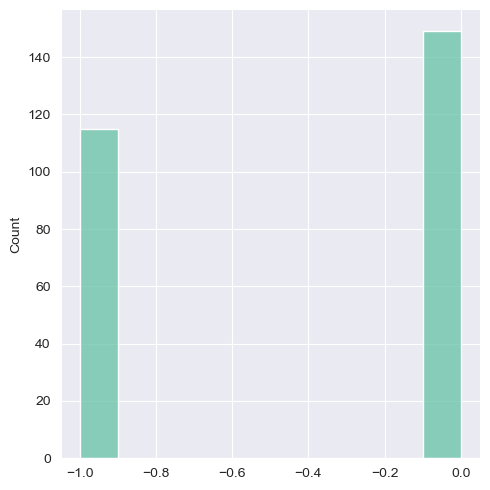

In [355]:
sns.displot(x=residues)
plt.show()

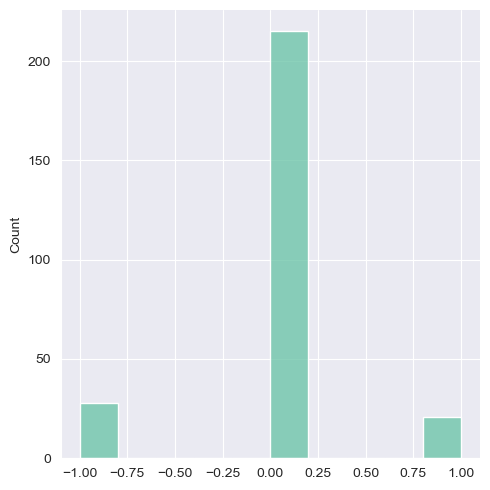

In [356]:
sns.displot(x=residues2)
plt.show()

In [357]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0, 115],
       [  0, 149]])

In [358]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)

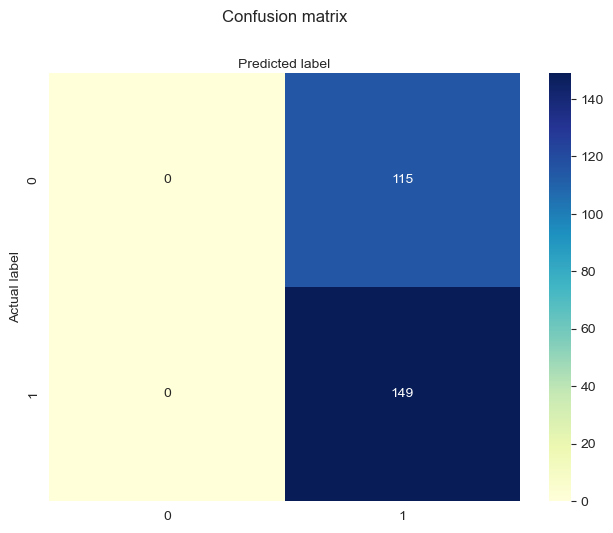

In [359]:
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

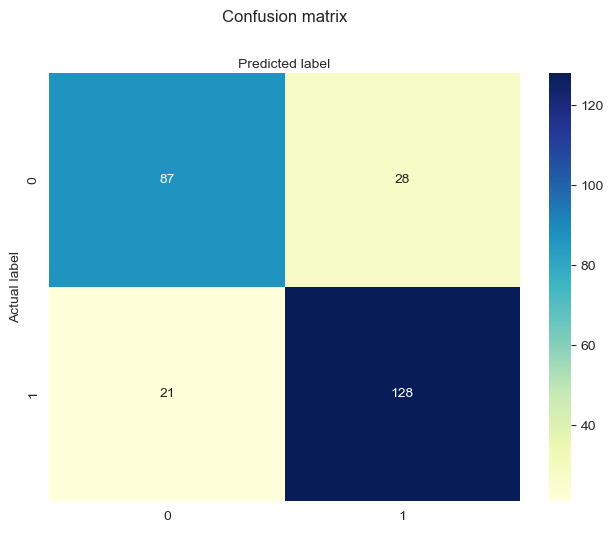

In [360]:
ax = sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### we can see better classification results after data transformation and scaling